# Goal: Implement a custom gird search CV with kFold cross validation on KNN 

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
x, y = make_classification(n_samples = 10000, n_features = 2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
xtrain, xtest, ytrain, ytest = train_test_split(x,y,stratify=y, random_state = 42)


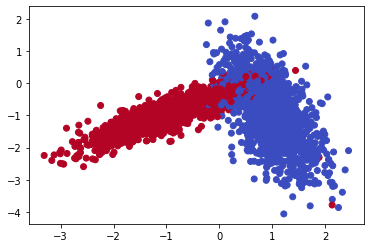

In [3]:
plt.scatter(xtest[:,0],xtest[:,1],c=ytest,cmap = 'coolwarm')
plt.show()

## Implementing custom gird search CV

In [4]:
def split_into_n_folds_indices(xtrain, n):
    set_indices = np.array_split(np.array(range(len(xtrain))),n)
    return set_indices 

In [5]:
#def perform_cv_for_the_sets(xtrain, ytrain, set_indices, num1, num2, i,trainsplitscores,testsplitscores): 
def perform_cv_for_the_sets(Xtrain, Ytrain, Xtest, Ytest, i,trainsplitscores,testsplitscores): 
    #Fit KNN neighbors
    classifier.n_neighbors = int(i)
    classifier.fit(Xtrain, Ytrain)
    #Predict for test set
    Ypredicted = classifier.predict(Xtest)
    testsplitscores.append(accuracy_score(Ytest, Ypredicted))
    #Predict for training set
    Ypredicted = classifier.predict(Xtrain)
    trainsplitscores.append(accuracy_score(Ytrain, Ypredicted))
    

In [6]:
#function will divide the datast into n-folds and each fold will have n-1 train set and 1 test set for accuracy evaluation

In [7]:
def RandomSearchCV(xtrain, ytrain, classifier, params, folds):

    testfoldindex = random.sample(range(folds),1)
    set_indices = split_into_n_folds_indices(xtrain, folds)
    
    trainscores = []
    testscores = []
        
    for i in tqdm(params['n_neighbors']):
        trainfoldscores = []
        testfoldscores = []
        trainsplitscores = []
        testsplitscores = []
        
        for fold in range(folds):
            predict_fold = fold
            train_indices = []
            for train_fold in range(folds):
                if train_fold != fold:
                    test_indices = set_indices[predict_fold]
                    train_indices =  list(set(list(range(1,len(xtrain)))) - set(set_indices[predict_fold]))
                    Xtrain = xtrain[train_indices] 
                    Ytrain = ytrain[train_indices]
                    Xtest =  xtrain[test_indices]
                    Ytest =  ytrain[test_indices]
                    print('Train and predict the model for the parm:', i, ' and Fold is:',fold)
                    perform_cv_for_the_sets(Xtrain, Ytrain, Xtest, Ytest, i,trainsplitscores,testsplitscores)
                    break
            trainfoldscores.append(np.mean(np.array(trainsplitscores)))
            testfoldscores.append(np.mean(np.array(testsplitscores)))   
        trainscores.append(np.mean(np.array(trainfoldscores)))
        testscores.append(np.mean(np.array(testfoldscores)))
                    
    return trainscores, testscores
        

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

Train and predict the model for the parm: 3  and Fold is: 0
Train and predict the model for the parm: 3  and Fold is: 1
Train and predict the model for the parm: 3  and Fold is: 2
Train and predict the model for the parm: 3  and Fold is: 3
Train and predict the model for the parm: 3  and Fold is: 4


 10%|████████▎                                                                          | 1/10 [00:01<00:17,  1.91s/it]

Train and predict the model for the parm: 4  and Fold is: 0
Train and predict the model for the parm: 4  and Fold is: 1
Train and predict the model for the parm: 4  and Fold is: 2
Train and predict the model for the parm: 4  and Fold is: 3
Train and predict the model for the parm: 4  and Fold is: 4


 20%|████████████████▌                                                                  | 2/10 [00:03<00:15,  1.94s/it]

Train and predict the model for the parm: 5  and Fold is: 0
Train and predict the model for the parm: 5  and Fold is: 1
Train and predict the model for the parm: 5  and Fold is: 2
Train and predict the model for the parm: 5  and Fold is: 3
Train and predict the model for the parm: 5  and Fold is: 4


 30%|████████████████████████▉                                                          | 3/10 [00:05<00:13,  1.91s/it]

Train and predict the model for the parm: 6  and Fold is: 0
Train and predict the model for the parm: 6  and Fold is: 1
Train and predict the model for the parm: 6  and Fold is: 2
Train and predict the model for the parm: 6  and Fold is: 3
Train and predict the model for the parm: 6  and Fold is: 4


 40%|█████████████████████████████████▏                                                 | 4/10 [00:07<00:11,  1.90s/it]

Train and predict the model for the parm: 10  and Fold is: 0
Train and predict the model for the parm: 10  and Fold is: 1
Train and predict the model for the parm: 10  and Fold is: 2
Train and predict the model for the parm: 10  and Fold is: 3
Train and predict the model for the parm: 10  and Fold is: 4


 50%|█████████████████████████████████████████▌                                         | 5/10 [00:09<00:09,  1.91s/it]

Train and predict the model for the parm: 13  and Fold is: 0
Train and predict the model for the parm: 13  and Fold is: 1
Train and predict the model for the parm: 13  and Fold is: 2
Train and predict the model for the parm: 13  and Fold is: 3
Train and predict the model for the parm: 13  and Fold is: 4


 60%|█████████████████████████████████████████████████▊                                 | 6/10 [00:11<00:07,  1.91s/it]

Train and predict the model for the parm: 14  and Fold is: 0
Train and predict the model for the parm: 14  and Fold is: 1
Train and predict the model for the parm: 14  and Fold is: 2
Train and predict the model for the parm: 14  and Fold is: 3
Train and predict the model for the parm: 14  and Fold is: 4


 70%|██████████████████████████████████████████████████████████                         | 7/10 [00:13<00:05,  1.92s/it]

Train and predict the model for the parm: 16  and Fold is: 0
Train and predict the model for the parm: 16  and Fold is: 1
Train and predict the model for the parm: 16  and Fold is: 2
Train and predict the model for the parm: 16  and Fold is: 3
Train and predict the model for the parm: 16  and Fold is: 4


 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [00:15<00:03,  1.95s/it]

Train and predict the model for the parm: 17  and Fold is: 0
Train and predict the model for the parm: 17  and Fold is: 1
Train and predict the model for the parm: 17  and Fold is: 2
Train and predict the model for the parm: 17  and Fold is: 3
Train and predict the model for the parm: 17  and Fold is: 4


 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [00:17<00:02,  2.07s/it]

Train and predict the model for the parm: 19  and Fold is: 0
Train and predict the model for the parm: 19  and Fold is: 1
Train and predict the model for the parm: 19  and Fold is: 2
Train and predict the model for the parm: 19  and Fold is: 3
Train and predict the model for the parm: 19  and Fold is: 4


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:20<00:00,  2.01s/it]


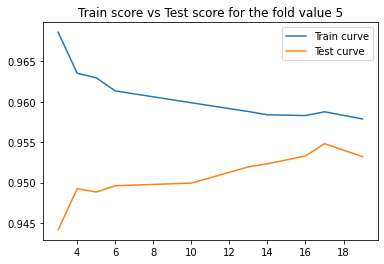

In [8]:
classifier = KNeighborsClassifier()

nlist = random.sample(range(1,20),10)
nlist.sort()
params = {'n_neighbors':nlist}

#when fold value is 5
folds = 5
trainscores, testscores = RandomSearchCV(xtrain, ytrain, classifier, params, folds)

plt.plot(params['n_neighbors'],trainscores, label = 'Train curve')
plt.plot(params['n_neighbors'],testscores, label = 'Test curve')
plt.legend()
plt.title('Train score vs Test score for the fold value 5')
plt.show()

In [9]:
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

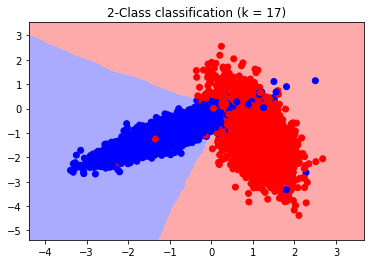

In [11]:
from matplotlib.colors import ListedColormap
classifier = KNeighborsClassifier(n_neighbors = 17)
classifier.fit(xtrain, ytrain)
plot_decision_boundary(xtrain[:, 0], xtrain[:, 1], ytrain, classifier)